# Stacks

A stack is a data structure that supports a subset of operations from a dynamic array. With a stack you may only add and delete elements from *one end* of the array (referred to as the top of the stack). 

#### *Last In, First Out*

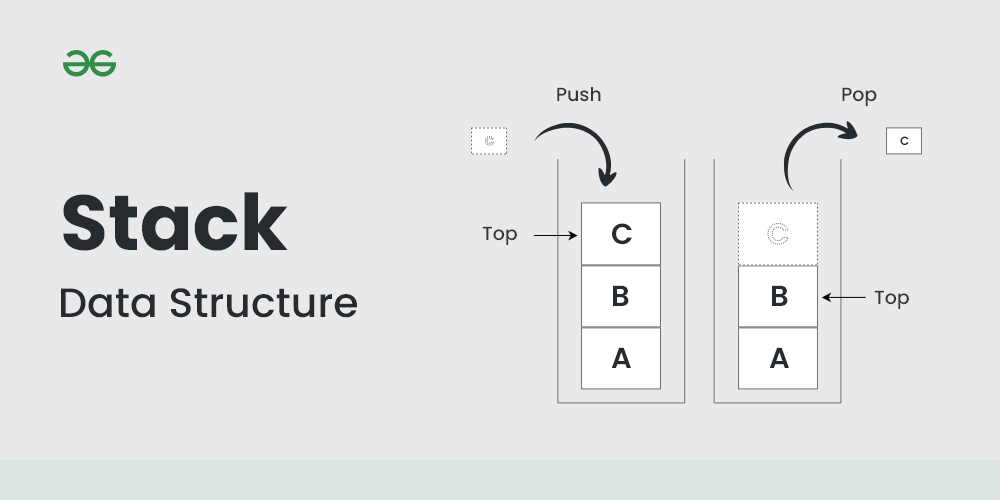

In the physical world, a stack can be conceptualized by thinking of a stack of plates. You may grab a plate from the top or you may add a plate to the top. You cannot remove or add a plate to the middle/bottom of the stack. This is the same as the stack data structure.

The stack supports three operations - *push, pop, peek*

## Push

The push operation adds an element to the top of the stack, which in dynamic array terms would be appending an element to the end. This is an efficient O(1) operation.

It helps to visualize a stack as an array that is vertical. The pseudocode demonstrates the concept, along with the visual where we add the integers. The top pointer updates to the top most item.

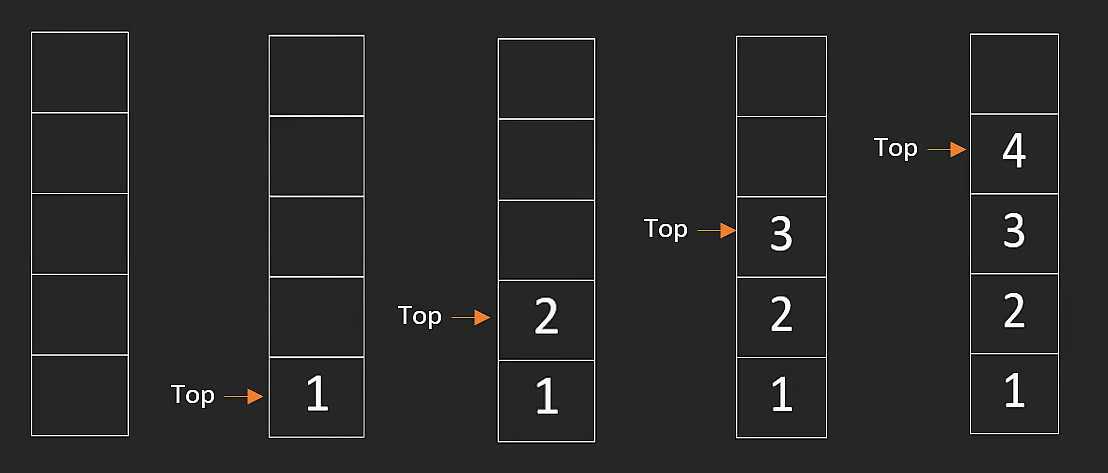

> in most languages there's no built in stack data structures - can just use dynamic array to simulate
> 
> Since a stack will remove elements in the reverse order that they were inserted in, it can be used to reverse sequences (like strings)

```python
def push(self, n):
    # using the pushback function from dynamic arrays to add to the stack
    self.stack.append(n)
```

## Pop

pop operation removes the last element from top of the stack, which in dynamic array terms would be reading and removing the last element. This is also O(1)

```python
def pop(self):
    return self.stack.pop()
```

> in most languages, good idea to check if stack is empty before popping

## Peek
The peek operation is the simplest. It simply returns, the top element without removing it.

```python
def peek(self):
    return self.stack[-1]
```

---
Time Complexity

| Operation | Big-O Time Complexity | Notes |
|:-|:-|-:|
| Push | O(1) | |
| Pop | O(1)* | Check if stack is empty first |
| Peek / Top | O(1)* | Retrieves without removing |


```python
# Implementing a stack is trivial using a dynamic array
# (which we implemented earlier).
class Stack:
    def __init__(self):
        self.stack = []

    def push(self, n):
        self.stack.append(n)

    def pop(self):
        return self.stack.pop()
```

## Problem 1: Valid Paranthesis

https://neetcode.io/problems/validate-parentheses

In [44]:
class Solution:
    def isValid(self, s: str) -> bool:
        #first element is open, second element is closed
        d={']':'[','}':'{',')':'(',}
        main=list(s)
        hold=[]
        #while the main is not empty
        while main:
            top=main.pop()
            #close bracket
            if top in d.keys():
                hold.append(d[top])
            else:
                try:
                    if hold[-1]==top:
                        hold.pop()
                    else:
                        return False
                except IndexError:
                    return False
        #return False if the holding stack is not clear
        return not hold
inst=Solution()
print(inst.isValid("()"))

True


In [ ]:
#their solution, much cleaner without so many if/elses
class Solution:
    def isValid(self, s: str) -> bool:
        Map = {")": "(", "]": "[", "}": "{"}
        stack = []

        for c in s:
            if c not in Map:
                #if c is an opening bracket
                stack.append(c)
                continue
            #here c is a closing bracket
            #if stack is empty, that means you've started with a inappropriate closing bracket
            #if the 
            if not stack or stack[-1] != Map[c]:
                return False
            #here c is closing, stack contains stuff, and the pair matches
            stack.pop()

        return not stack

In [47]:
def isValid(s):
    stack =[]
    CLoseToOpen={")": "(", "]": "[", "}": "{"}

    #iterate through each character
    for c in s:
        #if close
        if c in CLoseToOpen:
            if stack and stack[-1]==CLoseToOpen[c]:
                #get rid of the appropriate opening one in holding stack
                stack.pop()
            #either holding is empty in which case we've started with a close bracket, like odd numbers
            # or it doesnt match
            else:
                return False
        #if open, always just add to holding stack
        else:
            stack.append(c)
    return not stack

print(isValid('[]{[]}'))

True


## Problem 2: Minimum stack

In [57]:
#my solution
class MinStack:
    #youre allowed to use pop and append etc

    def __init__(self):
        self.stack=[]
        

    def push(self, val: int) -> None:
        self.stack.append(val)
        

    def pop(self) -> None:
        self.stack.pop()
        

    def top(self) -> int:
        return self.stack[-1]
        

    def getMin(self) -> int:
        print(self.stack)
        #let first elem be the smallest
        MinElem=self.stack[0]
        print('min',MinElem)
        for val in self.stack:
            print('val',val)
            if val<MinElem:
                print('issmaller',val)
                MinElem=val
        return MinElem
    

In [ ]:
#their solution, much neater
#getMin is O(1) complexity!!
class MinStack:
    def __init__(self):
        self.stack = []
        #this is a tracker that keeps a history of all the minimum of all the values so far
        # example a stack that is [4,9,2,1] has a MinStack of [4,4,2,1]
        #this way when we remove the last elem we immediately just retrieve the last elem from the history
        # when adding stuff to minStack just need to check if its smaller than the last
        self.minStack = []

    def push(self, val: int) -> None:
        self.stack.append(val)
        val = min(val, self.minStack[-1] if self.minStack else val)
        self.minStack.append(val)

    def pop(self) -> None:
        self.stack.pop()
        self.minStack.pop()

    def top(self) -> int:
        return self.stack[-1]

    def getMin(self) -> int:
        return self.minStack[-1]
